# Logistic Regression
E. Krupczak - 23 Aug 2018

Linear regression is great if you have a continuous outcome variable. But what about the case where you have a binary outcome variable? In that case, logistic regression is the appropriate weapon. 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

First, let's make some data with some continuous predictive features, $x_i$ and a binary outcome variable, $y$.

In [64]:
# Set the random seed so that the 'random' data is the same each time the code is run.
np.random.seed(seed=12345)

df = pd.DataFrame({
    'x1': np.random.binomial(10,0.5,1000),
    'x2': np.random.normal(5, 2, 1000),
    'x3': np.random.binomial(10,0.25,1000)
    }) 
df['sumcol'] = df.x1+df.x2+df.x3
maxsum = df.sumcol.max()
df['y'] = df.sumcol.apply(lambda x: np.random.binomial(1, x /maxsum))

# Continuous predictor.
x = df[['x1', 'x2', 'x3']]

# Binary outcome.
bin_y = df['y']

Now let's plot our two binomial and one gaussian variable against $y$.

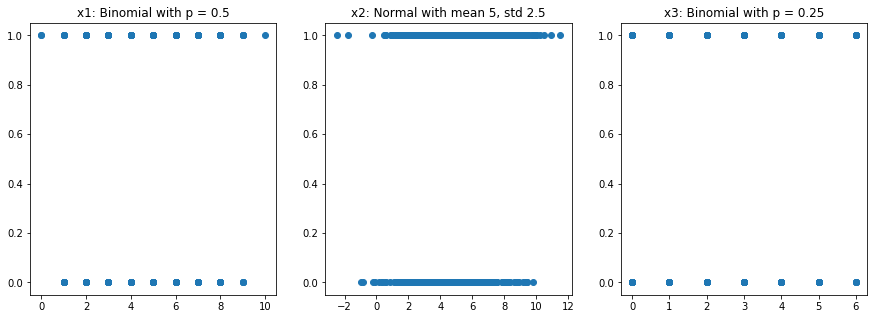

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(df.x1, df.y, 'o')
plt.title('x1: Binomial with p = 0.5')
plt.subplot(1,3,2)
plt.plot(df.x2, df.y, 'o')
plt.title('x2: Normal with mean 5, std 2.5')
plt.subplot(1,3,3)
plt.plot(df.x3, df.y,'o')
_=plt.title('x3: Binomial with p = 0.25')

We see that a linear regression is really going to struggle here. 

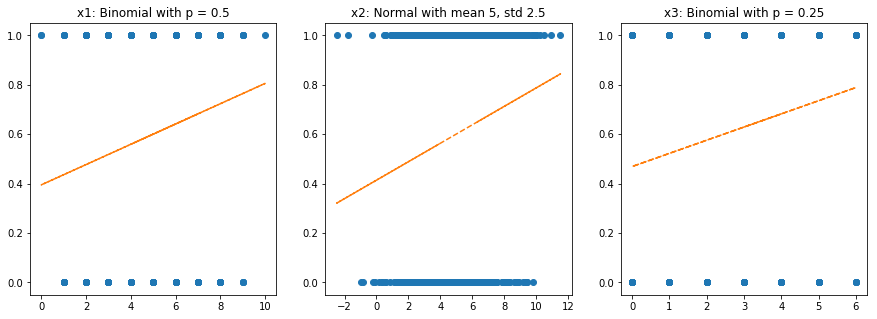

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(df.x1, df.y, 'o')
fit = np.polyfit(df.x1, df.y, 1)
fitfn = np.poly1d(fit)
plt.plot(df.x1, fitfn(df.x1), '--')
plt.title('x1: Binomial with p = 0.5')
plt.subplot(1,3,2)
plt.plot(df.x2, df.y, 'o')
fit = np.polyfit(df.x2, df.y, 1)
fitfn = np.poly1d(fit)
plt.plot(df.x2, fitfn(df.x2), '--')
plt.title('x2: Normal with mean 5, std 2.5')
plt.subplot(1,3,3)
plt.plot(df.x3, df.y,'o')
fit = np.polyfit(df.x3, df.y, 1)
fitfn = np.poly1d(fit)
plt.plot(df.x3, fitfn(df.x3), '--')
_=plt.title('x3: Binomial with p = 0.25')

Instead we'll introduce something called logits. The logit function gives the log-odds. The 'odds' of some outcome of probability $p$ are defined as follows:
$$\text{odds} = \frac{p}{1-p}$$
So if there is say, a 75% change of some outcome, the odds are 3 (i.e 3:1). It is the convention that the larger probability goes on top so that the odds are always greater than 1 if possible. 

We'll start by taking the probability, $p$, which is continuous, unlike $y$. We'll start with just one of our variables. 

In [90]:
# Unique values in x.
xvals = df.x1.unique()

# Calculate and store the odds.
yodds = []
for xi in xvals: 
    y1_ct = df[df.x1 == xi].y.sum()  # The number of trials y = 1.
    y0_ct = len(df[df.x1 == xi]) - y1_ct  # The number of trials y = 0.
    yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
    print(xi, y1_ct, y0_ct, len(df[df.x1 == xi]))

7 80 36 116
4 116 94 210
5 147 95 242
8 37 9 46
6 134 81 215
1 5 8 13
3 54 51 105
9 5 4 9
2 20 21 41
0 2 0 2
10 1 0 1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':


In [88]:
yodds

[2.2222222222222223,
 1.2340425531914894,
 1.5473684210526315,
 4.111111111111111,
 1.654320987654321,
 0.625,
 1.0588235294117647,
 1.25,
 0.9523809523809523,
 inf,
 inf]

In [91]:
import seaborn 
seaborn.__version__

'0.8.1'